# Project  : 06
# Applications used: "Google Maps","Waze","MapQuest"
# Project Name :  Travel and Navigation 

# Scrapping Reviews

In [1]:
!pip install -q google-play-scraper
import pandas as pd
from google_play_scraper import reviews
from google_play_scraper import Sort

In [2]:
apps = {
    "Google Maps": "com.google.android.apps.maps",
    "Waze Navigation & Live Traffic": "com.waze",
    "MapQuest": "com.mapquest.android.ace"
}


In [3]:
SORT = Sort.NEWEST
N_REVIEWS = 200000
reviews_dict =  {k : {} for k in apps}

In [4]:
for app in apps.keys():
    reviews_dict[app], _  = reviews(
         apps[app],
         lang='en',
         country='us',
         sort= SORT,
         count=N_REVIEWS, 
         filter_score_with=None
     )

In [5]:
import pandas as pd

df = pd.DataFrame()

for app in apps.keys():
    SAVE_DIR = r"D:\IIFT ACADEMIC\4th trimester\NLP\New folder\reviews_1st draft.csv"
    temp_df = pd.DataFrame(
        reviews_dict[app],
        columns=["reviewId", "content", "score","app"]
    )
    temp_df.to_csv(SAVE_DIR, index=False)
    temp_df["app"] = app
    df = pd.concat((df, temp_df))

df.to_csv("reviews_1st draft.csv", index=False)
print(df.head())

                               reviewId  \
0  940c8fa3-2d11-428a-bdb2-7d6f31ad09b2   
1  9017bd5c-131d-4b79-9064-1d73c24bccf9   
2  f87cf7f7-5c48-4d3f-a17c-3f977e76a592   
3  169e64e3-be34-4e7a-94a9-3851374d8356   
4  3ed4f38a-c0b0-4cf6-84c9-daf1d0bdff56   

                                             content  score          app  
0                                               Best      5  Google Maps  
1                                              And I      4  Google Maps  
2                                             Good 👍      5  Google Maps  
3                                      Very nice app      5  Google Maps  
4  Allways searching for GPS Very bad Not showing...      1  Google Maps  


In [6]:
import pandas as pd

# Assuming 'df' is your final DataFrame
review_counts = df.groupby('app')['reviewId'].count().reset_index(name='review_count')

print(review_counts)


                              app  review_count
0                     Google Maps        200000
1                        MapQuest         19775
2  Waze Navigation & Live Traffic        200000


In [7]:
df["content"] = df["content"].astype(str)

In [8]:
def word_count(s):
    return len(s.split())

df_filtered = df[df["content"].apply(word_count) >= 20]

# Display the filtered DataFrame
print(df_filtered)

                                   reviewId  \
6      d85741ca-36b5-4190-b5f1-a51a941e2787   
7      0aa31036-ffd7-416e-b8b8-e3e8adb3bac6   
19     4c5a39c9-d183-4d12-ac78-c6a6473c233d   
26     b61a3639-baf5-450c-b02b-c630c39c3876   
27     cc70b906-8740-4ed1-9117-4773b825a343   
...                                     ...   
19753  5520e857-4967-496f-9025-2012e9ced6ac   
19760  c036d81b-1e24-4d62-91ed-2709e85160c4   
19766  5ca0ca1c-b511-489a-996d-e660d5034b03   
19768  e72806d2-6ae2-48a5-8473-f72f72b33c1b   
19769  79f80db1-417e-46cb-9546-c4d366c6426f   

                                                 content  score          app  
6      I always used to recommend this app to everyon...      1  Google Maps  
7      Once again I have the samsung s24+ and am also...      1  Google Maps  
19     It's become junk. 1 - totally internet dependa...      1  Google Maps  
26     Great Google... Love you Google..Map Trusted D...      5  Google Maps  
27     Recently always losing GPS signal

In [415]:
df_ful = df[df["content"].apply(word_count) < 20]

# Display the filtered DataFrame
df_ful

,score,content,Assigned Topic,Topic 1 Probability,Topic 2 Probability,Topic 3 Probability,Topic 4 Probability,Topic 5 Probability,Topic 6 Probability,Topic 7 Probability,Topic 8 Probability,Topic 9 Probability


In [9]:
df_filtered.to_csv("reviews_2nd draft.csv", index = False)

In [10]:
import pandas as pd

# Load the DataFrame from CSV
df1 = pd.read_csv("reviews_2nd draft.csv", encoding='ISO-8859-1')

# Remove all rows with any null values
df1 = df1.dropna()

# Remove duplicate rows
df1 = df1.drop_duplicates()

# Save the cleaned DataFrame to a new CSV file (optional)
df1.to_csv("reviews_3rd draft.csv", index=False)

# Print the shape of the cleaned DataFrame to verify changes
print(df1.shape)


(84677, 4)


In [11]:
import numpy as np

# Pre Processing of Data

In [13]:
#creating features set 
features = df1.iloc[:, 1].values
print(features)


['I always used to recommend this app to everyone. This was my go-to when travelling it was amazing, but now I am so over it never works. GPS signal lost. What a disgrace time to fix it, guys.'
 "Once again I have the samsung s24+ and am also loosing the gps this doesn't help when I need it to find how to get to new locations. I have only noticed this since getting the update and am having to uninstall it all the time ð\x9f\x98\x9fð\x9f\x98\x9fð\x9f\x98\x9f"
 "It's become junk. 1 - totally internet dependant. ANY connectivity dropout & it falls apart with massive timeouts. 2 - Offline maps are account/internet tied, and don't contain favourites. No internet, no work. 3 - Updates req EVERY DAY or it breaks. Assistant the same. Slow & Useless with the first dropout. 4 - Routing is GOD AWFUL, a blind baboon could plot better routes. 5 - Map p.o.i's idiotically get cleaned during routing. 6 - locks audio channels from other apps accessing.. I could on..."
 ...
 'Unfortunately very slow.. W

In [14]:
#Created new dataframe of features
df1 = pd.DataFrame({'Reviews':features})
print(df1)

                                                 Reviews
0      I always used to recommend this app to everyon...
1      Once again I have the samsung s24+ and am also...
2      It's become junk. 1 - totally internet dependa...
3      Great Google... Love you Google..Map Trusted D...
4      Recently always losing GPS signal while drivin...
...                                                  ...
84672  Good strong start! Love that you can add multi...
84673  Routes work well in UK. Good voice prompts. Bu...
84674  Unfortunately very slow.. Way slower than stoc...
84675  Played with it for a few minutes at lunchtime,...
84676  Couldn't find two of my addresses that Google ...

[84677 rows x 1 columns]


In [15]:
#making it to lower case
df1['Reviews'] =df1['Reviews'].apply(lambda x: " ".join(x.lower()for x in str(x).split()))
df1['Reviews']

0        i always used to recommend this app to everyon...
1        once again i have the samsung s24+ and am also...
2        it's become junk. 1 - totally internet dependa...
3        great google... love you google..map trusted d...
4        recently always losing gps signal while drivin...
                               ...                        
84672    good strong start! love that you can add multi...
84673    routes work well in uk. good voice prompts. bu...
84674    unfortunately very slow.. way slower than stoc...
84675    played with it for a few minutes at lunchtime,...
84676    couldn't find two of my addresses that google ...
Name: Reviews, Length: 84677, dtype: object

In [16]:
#for removing punctuation
df1['Reviews'] = df1['Reviews'].str.replace(r'[^\w\s]', '', regex=True)
print(df1)

                                                 Reviews
0      i always used to recommend this app to everyon...
1      once again i have the samsung s24 and am also ...
2      its become junk 1  totally internet dependant ...
3      great google love you googlemap trusted deserv...
4      recently always losing gps signal while drivin...
...                                                  ...
84672  good strong start love that you can add multip...
84673  routes work well in uk good voice prompts but ...
84674  unfortunately very slow way slower than stock ...
84675  played with it for a few minutes at lunchtime ...
84676  couldnt find two of my addresses that google m...

[84677 rows x 1 columns]


In [17]:
#Remove numbers from the 'Reviews' column
df1['Reviews'] = df1['Reviews'].str.replace(r'\d+', '', regex=True)
print(df1)

                                                 Reviews
0      i always used to recommend this app to everyon...
1      once again i have the samsung s and am also lo...
2      its become junk   totally internet dependant a...
3      great google love you googlemap trusted deserv...
4      recently always losing gps signal while drivin...
...                                                  ...
84672  good strong start love that you can add multip...
84673  routes work well in uk good voice prompts but ...
84674  unfortunately very slow way slower than stock ...
84675  played with it for a few minutes at lunchtime ...
84676  couldnt find two of my addresses that google m...

[84677 rows x 1 columns]


In [18]:
#Removing Emoji
df1['Reviews'] = df1['Reviews'].str.replace(r'[^\w\s,]', '', regex=True)
print(df1)

                                                 Reviews
0      i always used to recommend this app to everyon...
1      once again i have the samsung s and am also lo...
2      its become junk   totally internet dependant a...
3      great google love you googlemap trusted deserv...
4      recently always losing gps signal while drivin...
...                                                  ...
84672  good strong start love that you can add multip...
84673  routes work well in uk good voice prompts but ...
84674  unfortunately very slow way slower than stock ...
84675  played with it for a few minutes at lunchtime ...
84676  couldnt find two of my addresses that google m...

[84677 rows x 1 columns]


In [19]:
import nltk

In [20]:
from nltk.corpus import stopwords
#remove stop words
stop = stopwords.words('english')
df1['Reviews'] =df1['Reviews'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df1['Reviews']

0        always used recommend app everyone goto travel...
1        samsung also loosing gps doesnt help need find...
2        become junk totally internet dependant connect...
3        great google love googlemap trusted deserve pl...
4        recently always losing gps signal driving walk...
                               ...                        
84672    good strong start love add multiple addresses ...
84673    routes work well uk good voice prompts ui drea...
84674    unfortunately slow way slower stock also find ...
84675    played minutes lunchtime slow moto milestone s...
84676    couldnt find two addresses google maps ringing...
Name: Reviews, Length: 84677, dtype: object

In [21]:
import textblob

In [22]:
from textblob import Word
#lemmatization 
df1['Reviews'] = df1['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df1['Reviews']


0        always used recommend app everyone goto travel...
1        samsung also loosing gps doesnt help need find...
2        become junk totally internet dependant connect...
3        great google love googlemap trusted deserve pl...
4        recently always losing gps signal driving walk...
                               ...                        
84672    good strong start love add multiple address se...
84673    route work well uk good voice prompt ui dreadf...
84674    unfortunately slow way slower stock also find ...
84675    played minute lunchtime slow moto milestone st...
84676    couldnt find two address google map ringing pr...
Name: Reviews, Length: 84677, dtype: object

In [23]:
#creating a list named txt
txt=[]

#storing all reviews in txt list
txt=df1['Reviews'].tolist()
txt

['always used recommend app everyone goto travelling amazing never work gps signal lost disgrace time fix guy',
 'samsung also loosing gps doesnt help need find get new location noticed since getting update uninstall time ððð',
 'become junk totally internet dependant connectivity dropout fall apart massive timeouts offline map accountinternet tied dont contain favourite internet work update req every day break assistant slow useless first dropout routing god awful blind baboon could plot better route map poi idiotically get cleaned routing lock audio channel apps accessing could',
 'great google love googlemap trusted deserve please always accurate especially traffic area vehicle stop trafficit puzzle every time ð ð',
 'recently always losing gps signal driving walking also map seem reliable anymore maybe google would like something aug thanks tip recalibration tip useful',
 'gps signal issue latest update aug using samsung kindly pls fix uninstalled latest version work fine',
 'eg cc

In [24]:
import re
import nltk
from nltk.corpus import words

# Download the word list if you haven't already
nltk.download('words')
english_vocab = set(words.words())

processed_features = []

for sentence in range(0, len(txt)):
    
    # Remove all special characters
    processed_feature = re.sub(r'\W', ' ', str(txt[sentence]))

    # Remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    
    # Remove all number characters 
    processed_feature = re.sub(r"\d", "", processed_feature)
 
    # Substituting multiple spaces with a single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    # Removing spaces from the end and front
    processed_feature = re.sub(r"^\s+|\s+$", "", processed_feature)
    
    # Converting to lowercase
    processed_feature = processed_feature.lower()

    # Remove all non-English words by checking against the English vocabulary
    processed_feature = ' '.join([word for word in processed_feature.split() if word in english_vocab])
     
    # Storing the processed feature in processed_features list each time the loop runs    
    processed_features.append(processed_feature)


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [25]:
#Creating new dataframe
df3 = pd.DataFrame({
    'Reviews': processed_features,
})

# Display the DataFrame
print(df3)

                                                 Reviews
0      always used recommend everyone amazing never w...
1      also loosing doesnt help need find get new loc...
2      become junk totally connectivity dropout fall ...
3      great love deserve please always accurate espe...
4      recently always losing signal driving walking ...
...                                                  ...
84672  good strong start love add multiple address se...
84673  route work well good voice prompt dreadful sma...
84674  unfortunately slow way stock also find shoppin...
84675  minute slow milestone star going play today mi...
84676  find two address map ringing problem one whole...

[84677 rows x 1 columns]


In [26]:
def word_count(s):
    return len(s.split())

df_filtered_1 = df3[df3["Reviews"].apply(word_count) >= 20]

# Display the filtered DataFrame
print(df_filtered_1)

                                                 Reviews
2      become junk totally connectivity dropout fall ...
8      looking designer puppy found perfect one puppy...
10     useless doesnt update properly went said home ...
14     map getting worse day day show turn turn miss ...
16     late map getting worse dependable year back de...
...                                                  ...
84626  need lot work direction turn left left turn po...
84636  great map program real complaint keep without ...
84645  thing prefer map one thing really miss map act...
84646  many thing wrong dont know start car middle sc...
84667  like simple design navigation missing eta land...

[32414 rows x 1 columns]


In [27]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [28]:
from langdetect import detect, DetectorFactory

# Set seed for reproducibility in language detection
DetectorFactory.seed = 0

# Function to detect if a sentence is in English
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Filter rows with English text
df_english = df_filtered_1[df_filtered_1['Reviews'].apply(is_english)]

print(df_english)


                                                 Reviews
2      become junk totally connectivity dropout fall ...
8      looking designer puppy found perfect one puppy...
10     useless doesnt update properly went said home ...
14     map getting worse day day show turn turn miss ...
16     late map getting worse dependable year back de...
...                                                  ...
84626  need lot work direction turn left left turn po...
84636  great map program real complaint keep without ...
84645  thing prefer map one thing really miss map act...
84646  many thing wrong dont know start car middle sc...
84667  like simple design navigation missing eta land...

[32205 rows x 1 columns]


In [29]:
df_english.to_csv("reviews_4th draft.csv", index = False)

In [30]:
df_lemmatized = pd.read_csv("reviews_4th draft.csv",encoding='ISO-8859-1')
df_lemmatized

,Reviews
0,become junk totally connectivity dropout fall ...
1,looking designer puppy found perfect one puppy...
2,useless doesnt update properly went said home ...
3,map getting worse day day show turn turn miss ...
4,late map getting worse dependable year back de...
...,...
32200,need lot work direction turn left left turn po...
32201,great map program real complaint keep without ...
32202,thing prefer map one thing really miss map act...
32203,many thing wrong dont know start car middle sc...


In [31]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install cleantext

Note: you may need to restart the kernel to use updated packages.


In [33]:
import numpy as np
import pandas as pd
import os
import nltk
import textblob
import unicodedata
import re
import sklearn.feature_extraction.text as text
import matplotlib.pyplot as plt
import seaborn as sns
import cleantext

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from google_play_scraper import reviews,Sort
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc

In [34]:
import gensim

# Load required packages

In [36]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Assuming `data` is your preprocessed list of documents
# Create a dictionary and corpus
data = df_lemmatized['Reviews'].astype(str).apply(nltk.word_tokenize).tolist()
dictionary = corpora.Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]

In [37]:
# Reduce Chunk Size if your RAM is not much
def compute_coherence_values(dictionary, corpus, texts, start=4, limit=13, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=400,
                                       passes=4,
                                       per_word_topics=True,
                                       workers=6)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Compute coherence scores
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=data)

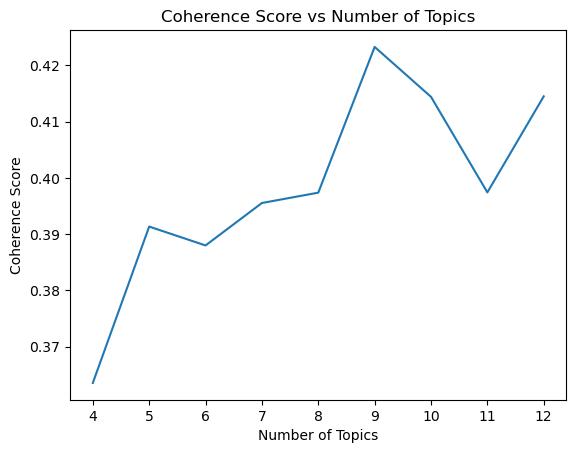

In [38]:
# Ensure coherence_values covers 22 values (one for each topic from 4 to 25)
plt.plot(range(4, 13), coherence_values) 
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs Number of Topics")
plt.show()



# optimal number of Topics = 09

In [183]:
lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    id2word=dictionary,
    num_topics=9,
    random_state=100,
    chunksize=400,
    passes=12,  # Number of passes through the corpus
    workers=3,  # Use multiple CPU cores
    per_word_topics=True
)

# Optimal Topics are 09

In [186]:
optimal_num_topics = 9

In [188]:
def extract_topic_info(lda_model, corpus, dictionary, texts):
    topics_info = {}
    for i in range(optimal_num_topics):
        words = lda_model.show_topic(i, topn=9)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        
        # Calculate exclusivity (this is a simplistic version, usually exclusivity calculations are more involved)
        topic_words = [word for word, _ in words]
        all_other_topics_words = [lda_model.show_topic(j, topn=9) for j in range(optimal_num_topics) if j != i]
        all_other_words = [word for sublist in all_other_topics_words for word, _ in sublist]
        exclusivity_score = len(set(topic_words) - set(all_other_words)) / len(topic_words)
        
        topics_info[i] = {
            'Top Words and Probabilities': words,
            'Coherence Score': coherence_score,
            'Exclusivity Score': exclusivity_score,
            'Held-out Likelihood': lda_model.log_perplexity(corpus),
            'Topic Prevalence': sum([dict(doc).get(i, 0) for doc in corpus]) / len(corpus),
            'Semantic Interpretability': "High" if coherence_score > 0.5 and exclusivity_score > 0.5 else "Moderate"
        }
    
    return topics_info

In [190]:
topics_info = extract_topic_info(lda_model, corpus, dictionary, data)

In [191]:
# Display topics information
for topic_id, info in topics_info.items():
    print(f"Topic {topic_id + 1}:")
    for key, value in info.items():
        print(f"• {key}: {value}")
    print("\n")

Topic 1:
• Top Words and Probabilities: [('turn', 0.04676655), ('voice', 0.034778938), ('direction', 0.02656291), ('map', 0.020704225), ('like', 0.018617878), ('right', 0.01641053), ('left', 0.014907478), ('navigation', 0.013635715), ('would', 0.013533068)]
• Coherence Score: 0.4269566880146238
• Exclusivity Score: 0.6666666666666666
• Held-out Likelihood: -7.022778281059007
• Topic Prevalence: 0.003384567613724577
• Semantic Interpretability: Moderate


Topic 2:
• Top Words and Probabilities: [('road', 0.036023453), ('speed', 0.032496415), ('traffic', 0.027381435), ('would', 0.023041584), ('report', 0.02159224), ('like', 0.018975098), ('love', 0.018277328), ('police', 0.018106094), ('great', 0.017155401)]
• Coherence Score: 0.4269566880146238
• Exclusivity Score: 0.3333333333333333
• Held-out Likelihood: -7.022765078915316
• Topic Prevalence: 0.010898928737773638
• Semantic Interpretability: Moderate


Topic 3:
• Top Words and Probabilities: [('phone', 0.02616908), ('work', 0.02608995

In [141]:
pip install WordCloud

# Wordcloud

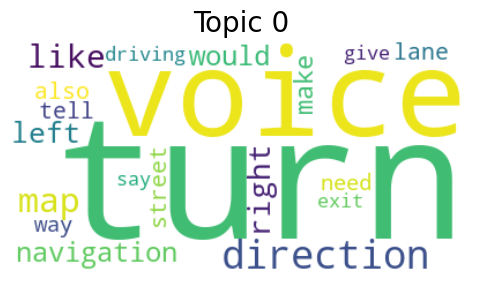

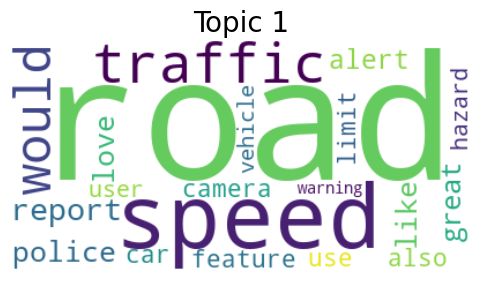

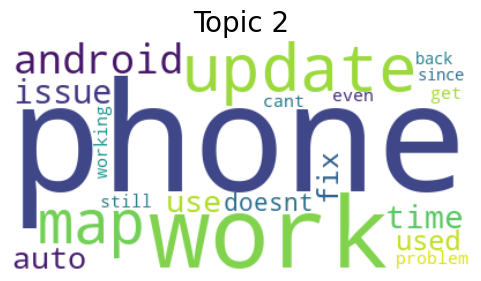

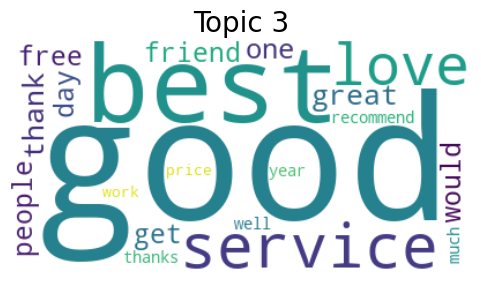

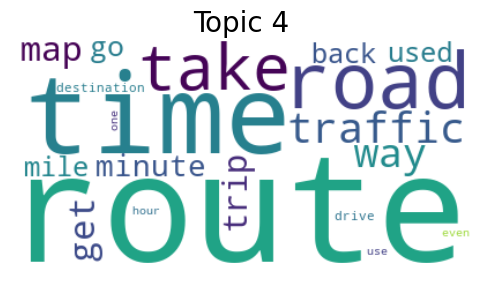

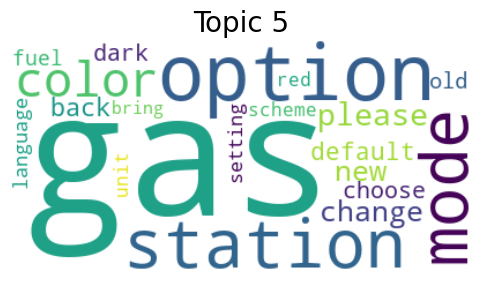

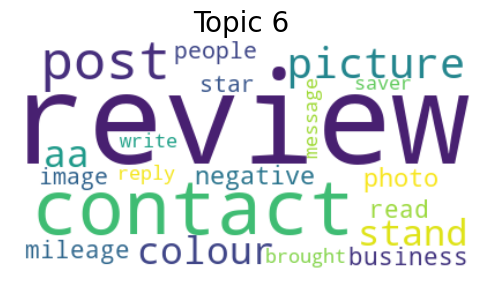

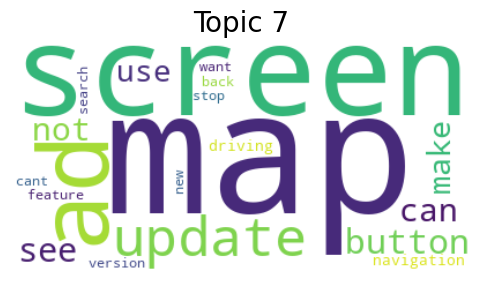

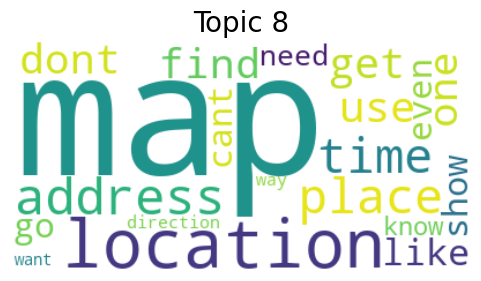

In [192]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example loop to generate and display word clouds for each topic
for topic_id, topic in lda_model.show_topics(formatted=False, num_words=20):
    # Generate word cloud
    wc = WordCloud(
        width=400,           # Width of the word cloud image
        height=200,          # Height of the word cloud image
        max_font_size=150,   # Maximum font size for the most frequent word
        background_color='white'  # Background color of the word cloud
    ).generate_from_frequencies(dict(topic))
    
    # Create a figure with reduced size
    plt.figure(figsize=(6, 3))  # Adjusted figure size to be smaller
    
    # Display the word cloud
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    
    # Set title for the word cloud
    plt.title(f'Topic {topic_id}', fontsize=20)  # Title size
    
    # Show the plot
    plt.show()


# Saving Topics

In [193]:
for i in range(0,9):
    df_topic_classification[df_topic_classification['Dominant_Topic'] == i].to_csv(f"topic_{i}.csv", index = False)
    print(f"Topic {i} Saved...")

Topic 0 Saved...
Topic 1 Saved...
Topic 2 Saved...
Topic 3 Saved...
Topic 4 Saved...
Topic 5 Saved...
Topic 6 Saved...
Topic 7 Saved...
Topic 8 Saved...


In [194]:
import pandas as pd

In [195]:
df= pd.read_csv(r"reviews_3rd draft.csv")

In [196]:
df.tail()

,reviewId,content,score,app
84672,5520e857-4967-496f-9025-2012e9ced6ac,Good strong start! Love that you can add multi...,4,MapQuest
84673,c036d81b-1e24-4d62-91ed-2709e85160c4,Routes work well in UK. Good voice prompts. Bu...,3,MapQuest
84674,5ca0ca1c-b511-489a-996d-e660d5034b03,Unfortunately very slow.. Way slower than stoc...,0,MapQuest
84675,e72806d2-6ae2-48a5-8473-f72f72b33c1b,"Played with it for a few minutes at lunchtime,...",2,MapQuest
84676,79f80db1-417e-46cb-9546-c4d366c6426f,Couldn't find two of my addresses that Google ...,1,MapQuest


In [204]:
import pandas as pd

# Load your DataFrame from the CSV file
df = pd.read_csv(r"reviews_3rd draft.csv")

# Initialize an empty DataFrame for combined reviews
combined_df = pd.DataFrame()

# Loop through each score from 1 to 5
for score in range(1, 6):
    # Filter reviews with the specific score
    df_filtered = df[df['score'] == score]
    
    # Sample 400 reviews (or fewer if not enough reviews are available)
    df_sampled = df_filtered.sample(n=min(400, len(df_filtered)), random_state=42)
    
    # Append the sampled data to the combined DataFrame
    combined_df = pd.concat([combined_df, df_sampled])

# Check if we have collected exactly 2000 reviews
if len(combined_df) != 2000:
    print(f"Warning: Collected {len(combined_df)} reviews. Adjust the sampling or review filtering criteria if necessary.")

# Save the combined DataFrame to a CSV file
file_path = 'combined_reviews.csv'
combined_df.to_csv(file_path, index=False)

print(f"Combined DataFrame saved to {file_path}")


Combined DataFrame saved to combined_reviews.csv


In [206]:
combined_df.head()

,reviewId,content,score,app
50100,09920f35-bbde-4340-8a95-0eb636d1fde9,Just started using So far ads are in the way C...,1,Waze Navigation & Live Traffic
5517,638ec32c-6978-4c17-bf80-ef30c4b4990e,It's a good app but today it loose our 7 litre...,1,Google Maps
15332,2611da9f-3ea9-4d8c-822b-2c6218de857f,What's going on with the Xiaomi phones calibra...,1,Google Maps
33366,a05ea897-9ee6-4270-aafa-ec0436cffd28,Public transit option is not showing any resul...,1,Google Maps
19042,95c05157-5c67-440f-82cc-acec709adb55,"Very horrible experience with Google map, I co...",1,Google Maps


In [208]:
combined_df.describe

<bound method NDFrame.describe of                                    reviewId  \
50100  09920f35-bbde-4340-8a95-0eb636d1fde9   
5517   638ec32c-6978-4c17-bf80-ef30c4b4990e   
15332  2611da9f-3ea9-4d8c-822b-2c6218de857f   
33366  a05ea897-9ee6-4270-aafa-ec0436cffd28   
19042  95c05157-5c67-440f-82cc-acec709adb55   
...                                     ...   
74438  03f5c548-e0f2-4004-8eef-b2e4b9d975c2   
65365  06c9797f-d7bc-473f-a16b-ebf517a22f00   
59076  e7b70f32-5cab-4d43-af15-3f03b4d631cb   
51290  ec419fda-16f3-49e8-bca4-fde49632d645   
75273  a710d498-561f-46e7-b279-6686f16b22f7   

                                                 content  score  \
50100  Just started using So far ads are in the way C...      1   
5517   It's a good app but today it loose our 7 litre...      1   
15332  What's going on with the Xiaomi phones calibra...      1   
33366  Public transit option is not showing any resul...      1   
19042  Very horrible experience with Google map, I co...      1   

In [210]:
# Load the DataFrame from the CSV file
df = pd.read_csv(r"combined_reviews.csv")

# Define the path for the Excel file
excel_file_path = 'combined_reviews.xlsx'

# Save the DataFrame to an Excel file
df.to_excel(excel_file_path, index=False, engine='openpyxl')

print(f"Excel file saved to {excel_file_path}")

# Load the DataFrame from the CSV file
df = pd.read_csv(r"combined_reviews.csv")

# Define the path for the Excel file
excel_file_path = 'combined_reviews.xlsx'

# Save the DataFrame to an Excel file
df.to_excel(excel_file_path, index=False, engine='openpyxl')

Excel file saved to combined_reviews.xlsx


In [212]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows

In [220]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Load the data
file_path = 'combined_reviews.csv'
df = pd.read_csv(file_path)

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['content'])

# Fit the LDA model
num_topics = 9  # This should match your optimal number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda_model.fit(X)

# Get topic distributions for each document
topic_distributions = lda_model.transform(X)

# Add topic probabilities to the DataFrame
for i in range(num_topics):
    df[f'Topic {i+1} Probability'] = topic_distributions[:, i]

# Assign the topic with the highest probability to each review
df['Assigned Topic'] = topic_distributions.argmax(axis=1) + 1  # +1 to match topic indexing

# Save the results to a new Excel file
output_file_path = 'review_topic_assignment.xlsx'
df.to_excel(output_file_path, index=False, columns=['score', 'content', 'Assigned Topic'] + [f'Topic {i+1} Probability' for i in range(num_topics)])

output_file_path


'review_topic_assignment.xlsx'

In [1]:
import pandas as pd
import gensim
from gensim import corpora
import numpy as np

# Load your DataFrame from the CSV file
df = pd.read_csv(r"reviews_3rd draft.csv")

# Assuming the column with reviews is named 'content'
texts = df['content'].tolist()

# Create the Gensim dictionary and corpus from your reviews
# Tokenize and preprocess your text as needed
texts_processed = [text.split() for text in texts]  # Simple split for demonstration
dictionary = corpora.Dictionary(texts_processed)
corpus = [dictionary.doc2bow(text) for text in texts_processed]

# Define your LDA model (if not already trained)
lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    id2word=dictionary,
    num_topics=9,
    random_state=100,
    chunksize=400,
    passes=12,
    workers=3,
    per_word_topics=True
)

# Get topic distributions for each document
def get_topic_distribution(doc, model):
    return [prob for topic_id, prob in model.get_document_topics(doc, minimum_probability=0)]

# Convert corpus to topic distributions
topic_distributions = np.array([get_topic_distribution(doc, lda_model) for doc in corpus])

# Make sure topic_distributions has the same number of columns as num_topics
num_topics = lda_model.num_topics
if topic_distributions.shape[1] < num_topics:
    topic_distributions = np.hstack([topic_distributions, np.zeros((topic_distributions.shape[0], num_topics - topic_distributions.shape[1]))])

# Assign the topic with the highest probability to each review
df['Assigned Topic'] = topic_distributions.argmax(axis=1) + 1  # +1 to match topic indexing

# Save the updated DataFrame with assigned topics
output_file_path = 'reviews_with_assigned_topics.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path


KeyboardInterrupt: 

### % of Total Docs

In [230]:
# Count the number of documents assigned to each topic
topic_counts = df['Assigned Topic'].value_counts().sort_index()

# Calculate the percentage of total documents for each topic
topic_percentages = (topic_counts / len(df)) * 100

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Topic Number': topic_percentages.index,
    '% of Total Docs': topic_percentages.values
})

# Display the summary table
print(summary_df)

# Optionally, save the summary to an Excel file
summary_output_file_path = 'topic_summary.xlsx'
summary_df.to_excel(summary_output_file_path, index=False)

summary_output_file_path


   Topic Number  % of Total Docs
0             1         6.239002
1             2         0.011810
2             3        24.014786
3             4         0.105105
4             5        14.101822
5             6        10.508166
6             7         0.818404
7             8         2.259173
8             9        41.941732


'topic_summary.xlsx'

In [232]:
topic_counts

Assigned Topic
1     5283
2       10
3    20335
4       89
5    11941
6     8898
7      693
8     1913
9    35515
Name: count, dtype: int64

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Load the data
file_path = 'combined_reviews.csv'
df = pd.read_csv(file_path)

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['content'])

# Fit the LDA model
num_topics = 9  # This should match your optimal number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda_model.fit(X)

# Get topic distributions for each document
topic_distributions = lda_model.transform(X)

# Add topic probabilities to the DataFrame
for i in range(num_topics):
    df[f'Topic {i+1} Probability'] = topic_distributions[:, i]

# Assign the topic with the highest probability to each review
df['Assigned Topic'] = topic_distributions.argmax(axis=1) + 1  # +1 to match topic indexing

# Save the results to a new Excel file
output_file_path = 'review_topic_assignment.csv'
df.to_csv(output_file_path, index=False, columns=['score', 'content', 'Assigned Topic'] + [f'Topic {i+1} Probability' for i in range(num_topics)])

output_file_path

'review_topic_assignment.csv'

In [283]:
df.head()

,reviewId,content,score,app,Topic 1 Probability,Topic 2 Probability,Topic 3 Probability,Topic 4 Probability,Topic 5 Probability,Topic 6 Probability,Topic 7 Probability,Topic 8 Probability,Topic 9 Probability,Assigned Topic
0,09920f35-bbde-4340-8a95-0eb636d1fde9,Just started using So far ads are in the way C...,1,Waze Navigation & Live Traffic,0.518017,0.019576,0.237056,0.019577,0.019576,0.127440,0.019582,0.019594,0.019582,1
1,638ec32c-6978-4c17-bf80-ef30c4b4990e,It's a good app but today it loose our 7 litre...,1,Google Maps,0.023908,0.023883,0.023913,0.023889,0.023884,0.023887,0.023883,0.808869,0.023884,8
2,2611da9f-3ea9-4d8c-822b-2c6218de857f,What's going on with the Xiaomi phones calibra...,1,Google Maps,0.021878,0.021860,0.825070,0.021861,0.021866,0.021869,0.021867,0.021868,0.021862,3
3,a05ea897-9ee6-4270-aafa-ec0436cffd28,Public transit option is not showing any resul...,1,Google Maps,0.792330,0.025955,0.025973,0.025955,0.025954,0.025959,0.025954,0.025964,0.025955,1
4,95c05157-5c67-440f-82cc-acec709adb55,"Very horrible experience with Google map, I co...",1,Google Maps,0.335542,0.510371,0.022026,0.022003,0.022004,0.022017,0.021997,0.022016,0.022024,2


In [339]:
pip install dominance-analysis

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Excel file
file_path = 'review_topic_assignment.xlsx'
df = pd.read_excel(file_path)

# Drop unnecessary columns
df_cleaned = df.drop(columns=['content', 'Assigned Topic'])

# Prepare the data
X = df_cleaned.drop(columns=['score'])
y = df_cleaned['score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Dominance analysis

In [33]:
import itertools
import pandas as pd
import statsmodels.api as sm

# Function to calculate R-squared
def calculate_r_squared(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.rsquared

# Function for dominance analysis
def dominance_analysis(X, y):
    predictors = X.columns
    dominance_results = pd.DataFrame(0, index=predictors, columns=['Contribution'])
    
    for subset_size in range(1, len(predictors) + 1):
        for subset in itertools.combinations(predictors, subset_size):
            subset = list(subset)
            remaining_predictors = [p for p in predictors if p not in subset]
            
            r2_subset = calculate_r_squared(X[subset], y)
            
            for predictor in remaining_predictors:
                r2_full = calculate_r_squared(X[subset + [predictor]], y)
                dominance_results.loc[predictor, 'Contribution'] += r2_full - r2_subset
    
    total_contribution = dominance_results['Contribution'].sum()
    dominance_results['Percentage Relative Importance'] = (dominance_results['Contribution'] / total_contribution) * 100
    return dominance_results.sort_values(by='Percentage Relative Importance', ascending=False)

# Assuming X_train and y_train are already prepared
dominance_summary = dominance_analysis(X_train, y_train)

# Display the results
print(dominance_summary)


C:\Users\asus\AppData\Local\Temp\ipykernel_9836\1548557612.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0017846876523334165' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dominance_results.loc[predictor, 'Contribution'] += r2_full - r2_subset


                     Contribution  Percentage Relative Importance
Topic 3 Probability      2.048857                       54.761823
Topic 1 Probability      0.416469                       11.131370
Topic 2 Probability      0.397184                       10.615921
Topic 6 Probability      0.385391                       10.300714
Topic 8 Probability      0.198872                        5.315446
Topic 9 Probability      0.140256                        3.748748
Topic 5 Probability      0.068479                        1.830308
Topic 4 Probability      0.048660                        1.300583
Topic 7 Probability      0.037230                        0.995087


In [65]:
pip install prince


Note: you may need to restart the kernel to use updated packages.


In [391]:
import pandas as pd

# Load the data from the uploaded Excel file
file_path = 'review_topic_assignment.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()


,score,content,Assigned Topic,Topic 1 Probability,Topic 2 Probability,Topic 3 Probability,Topic 4 Probability,Topic 5 Probability,Topic 6 Probability,Topic 7 Probability,Topic 8 Probability,Topic 9 Probability
0,1,Just started using So far ads are in the way C...,1,0.518017,0.019576,0.237056,0.019577,0.019576,0.127440,0.019582,0.019594,0.019582
1,1,It's a good app but today it loose our 7 litre...,8,0.023908,0.023883,0.023913,0.023889,0.023884,0.023887,0.023883,0.808869,0.023884
2,1,What's going on with the Xiaomi phones calibra...,3,0.021878,0.021860,0.825070,0.021861,0.021866,0.021869,0.021867,0.021868,0.021862
3,1,Public transit option is not showing any resul...,1,0.792330,0.025955,0.025973,0.025955,0.025954,0.025959,0.025954,0.025964,0.025955
4,1,"Very horrible experience with Google map, I co...",2,0.335542,0.510371,0.022026,0.022003,0.022004,0.022017,0.021997,0.022016,0.022024


In [13]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'Review.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
df.head(), df.columns

(   score                                            content  \
 0      1  Just started using So far ads are in the way C...   
 1      1  It's a good app but today it loose our 7 litre...   
 2      1  What's going on with the Xiaomi phones calibra...   
 3      1  Public transit option is not showing any resul...   
 4      1  Very horrible experience with Google map, I co...   
 
                          Assigned Topic  \
 0  Turn-by-Turn Navigation Instructions   
 1  Reviews and User Feedback Mechanisms   
 2    App Performance and Updates Issues   
 3  Turn-by-Turn Navigation Instructions   
 4    Traffic and Road Condition Reports   
 
    Turn-by-Turn Navigation Instructions Probability  \
 0                                          0.518017   
 1                                          0.023908   
 2                                          0.021878   
 3                                          0.792330   
 4                                          0.335542   
 
    Traffi

### OLS Regression 

In [23]:
import statsmodels.api as sm

# Define the dependent variable (score) and the independent variables (probability columns)
X = df.iloc[:, 3:]  # Selecting all probability columns
y = df['score']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the summary of the OLS regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.156
Date:                Wed, 28 Aug 2024   Prob (F-statistic):            0.00148
Time:                        22:59:43   Log-Likelihood:                -3518.4
No. Observations:                2000   AIC:                             7055.
Df Residuals:                    1991   BIC:                             7105.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        2.7553      0.050     54.614      0.000       2.656       2.854
Turn-by-Turn Navigation Instructions Probability             0.3538      0.111      3.190      0.001       0.136       0.571
Traffic and Road Condition Reports  Probability              0.7510      0.253      2.972      0.003       0.255       1.247
App Performance and Updates Issues  Probability             -0.1704      0.116     -1.475      0.140      -0.397       0.056
Positive Feedback and Recommendations  Probability           0.0846      0.258      0.328      0.743      -0.421       0.590
Route Planning and Travel Time  Probability                  0.5130      0.249      2.062      0.039       0.025       1.001
Gas Stations and Map Customization Features  Probability     0.3128      0.172      1.818      0.069      -0.025       0.650
Reviews and User Feedback Mechanisms  Probability            0.2424      0.267      0.909      0.363      -0.280       0.765
Map Interface and Display Concerns  Probability              0.1701      0.114      1.496      0.135      -0.053       0.393
Location Search and Address Accuracy  Probability            0.4978      0.228      2.187      0.029       0.051       0.944
==============================================================================
Omnibus:                     3017.763   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.626
Skew:                          -0.010   Prob(JB):                     1.59e-29
Kurtosis:                       1.739   Cond. No.                     6.79e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.12e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
pip install prince


In [63]:
# Assuming df is your DataFrame and it contains 'score' and 'Assigned Topic'

# Discretize the score into bins for correspondence analysis
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['score_binned'] = discretizer.fit_transform(df[['score']])

# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['score_binned'], df['Assigned Topic'])

NameError: name 'KBinsDiscretizer' is not defined

### Correspondence  Analysis

In [61]:
pip install adjustText

In [90]:
from IPython.display import FileLink
FileLink('correspondence_analysis_plot.png')


C:\Users\asus\NLP\correspondence_analysis_plot.png

C:\Users\asus\AppData\Local\Temp\ipykernel_9836\3799797845.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, y = col_coords[0][i], col_coords[1][i]


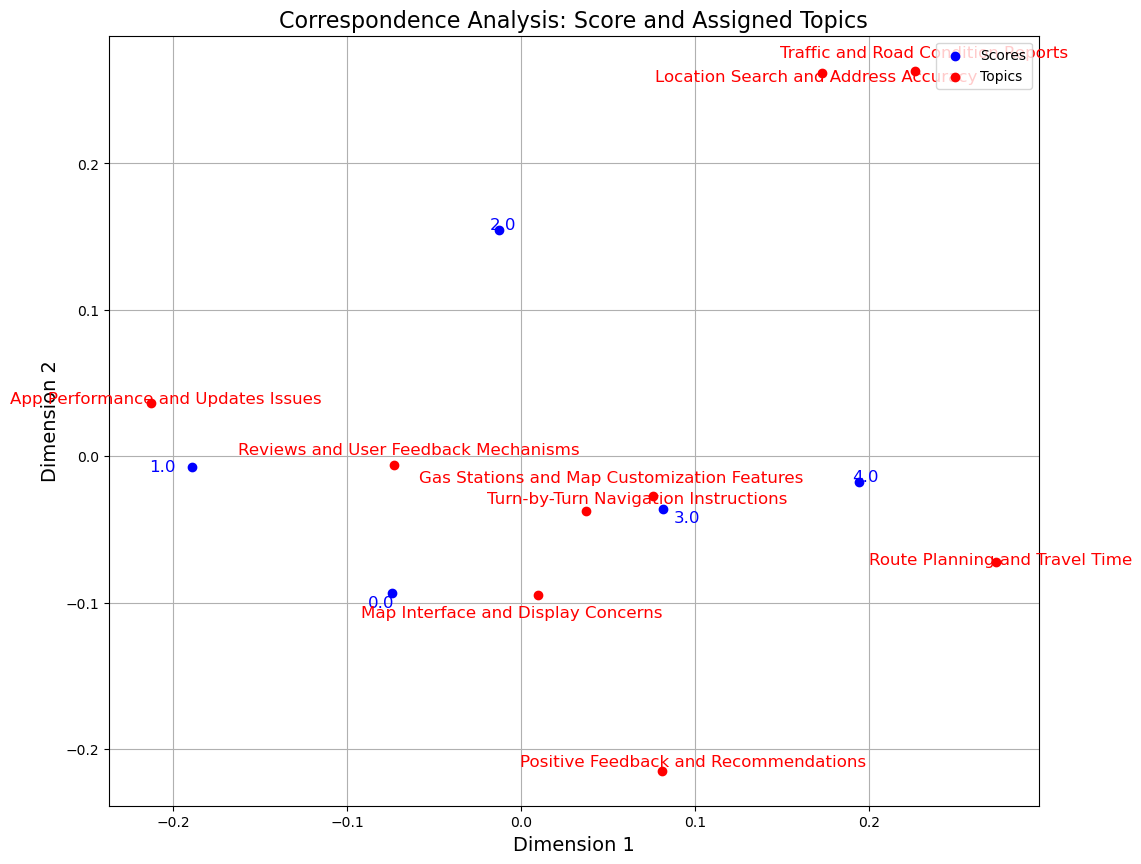

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Perform Correspondence Analysis (CA)
ca = CA(n_components=2)
ca_result = ca.fit(contingency_table)

# Get the row and column coordinates
row_coords = ca_result.row_coordinates(contingency_table)
col_coords = ca_result.column_coordinates(contingency_table)

# Plot the results
plt.figure(figsize=(12, 10))  # Increased figure size
plt.scatter(row_coords[0], row_coords[1], label='Scores', c='blue')
plt.scatter(col_coords[0], col_coords[1], label='Topics', c='red')

# Annotate the points with larger font size and slight shifts to avoid overlap
for i, txt in enumerate(row_coords.index):
    x, y = row_coords[0][i], row_coords[1][i]
    plt.annotate(txt, (x + np.random.uniform(-0.02, 0.02), y + np.random.uniform(-0.02, 0.02)), 
                 color='blue', fontsize=12, ha='center')

for i, txt in enumerate(col_coords.index):
    x, y = col_coords[0][i], col_coords[1][i]
    plt.annotate(txt, (x + np.random.uniform(-0.02, 0.02), y + np.random.uniform(-0.02, 0.02)), 
                 color='red', fontsize=12, ha='center')

plt.title('Correspondence Analysis: Score and Assigned Topics', fontsize=16)
plt.xlabel('Dimension 1', fontsize=14)
plt.ylabel('Dimension 2', fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot as an image file
plt.savefig('correspondence_analysis_plot.png', dpi=300, bbox_inches='tight')

# Optionally, show the plot
plt.show()


In [96]:
from IPython.display import FileLink
FileLink('correspondence_analysis_plot.png')


C:\Users\asus\NLP\correspondence_analysis_plot.png

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Load the data
file_path = '50000 reviews.xlsx'
df = pd.read_excel(file_path)  # Corrected function

# Check for missing values in the 'content' column
print(df['content'].isnull().sum())  # Print the number of missing values

# Handle missing values by filling with an empty string
df['content'].fillna('', inplace=True)  # Replace NaN with empty string

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['content'])

# Fit the LDA model
num_topics = 9  # This should match your optimal number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda_model.fit(X)

# Get topic distributions for each document
topic_distributions = lda_model.transform(X)

# Add topic probabilities to the DataFrame
for i in range(num_topics):
    df[f'Topic {i+1} Probability'] = topic_distributions[:, i]

# Assign the topic with the highest probability to each review
df['Assigned Topic'] = topic_distributions.argmax(axis=1) + 1  # +1 to match topic indexing

# Save the results to a new CSV file
output_file_path = 'review_topic_assignment.csv'
df.to_csv(output_file_path, index=False, columns=['score', 'content', 'Assigned Topic'] + [f'Topic {i+1} Probability' for i in range(num_topics)])

output_file_path


1


C:\Users\asus\AppData\Local\Temp\ipykernel_22304\1396579314.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['content'].fillna('', inplace=True)  # Replace NaN with empty string


'review_topic_assignment.csv'

In [47]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'review_topic_assignment.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head(), df.columns

(   score                                            content  Assigned Topic  \
 0      1  I always used to recommend this app to everyon...               3   
 1      1  Once again I have the samsung s24+ and am also...               3   
 2      1  It's become junk. 1 - totally internet dependa...               3   
 3      5  Great Google... Love you Google..Map Trusted D...               7   
 4      3  Recently always losing GPS signal while drivin...               3   
 
    Topic 1 Probability  Topic 2 Probability  Topic 3 Probability  \
 0             0.025464             0.025447             0.796353   
 1             0.023568             0.023567             0.811447   
 2             0.318719             0.016397             0.566440   
 3             0.024621             0.024618             0.024628   
 4             0.114661             0.022129             0.730416   
 
    Topic 4 Probability  Topic 5 Probability  Topic 6 Probability  \
 0             0.025460          

In [51]:
df.describe()

,score,Assigned Topic,Topic 1 Probability,Topic 2 Probability,Topic 3 Probability,Topic 4 Probability,Topic 5 Probability,Topic 6 Probability,Topic 7 Probability,Topic 8 Probability,Topic 9 Probability
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.413140,5.289720,0.041749,0.031483,0.319381,0.041560,0.036864,0.030889,0.422963,0.038858,0.036251
std,1.532639,2.048001,0.076611,0.054981,0.349037,0.077726,0.072352,0.049656,0.348263,0.065173,0.077723
min,1.000000,1.000000,0.012113,0.008660,0.012107,0.012160,0.012107,0.008617,0.012119,0.008615,0.012108
25%,1.000000,3.000000,0.020319,0.020017,0.022786,0.020299,0.020212,0.020030,0.025471,0.020406,0.020097
50%,2.000000,7.000000,0.023756,0.023316,0.030089,0.023716,0.023553,0.023336,0.506531,0.023844,0.023409
75%,4.000000,7.000000,0.027347,0.026519,0.749750,0.027249,0.026919,0.026553,0.779703,0.027447,0.026647
max,5.000000,9.000000,0.882382,0.884886,0.882715,0.889856,0.898056,0.891638,0.885650,0.888029,0.898954


In [49]:
import statsmodels.api as sm

# Define the dependent variable (score) and the independent variables (probability columns)
X = df.iloc[:, 3:]  # Selecting all probability columns
y = df['score']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the summary of the OLS regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     357.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:26:45   Log-Likelihood:                -90905.
No. Observations:               50000   AIC:                         1.818e+05
Df Residuals:                   49991   BIC:                         1.819e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6831      0.020    137.148      0.000       2.645       2.721
Topic 1 Probability     0.9961      0.082     12.156      0.000       0.835       1.157
Topic 2 Probability     1.2346      0.112     11.054      0.000       1.016       1.453
Topic 3 Probability    -1.0229      0.030    -34.163      0.000      -1.082      -0.964
Topic 4 Probability    -0.4790      0.080     -5.965      0.000      -0.636      -0.322
Topic 5 Probability     0.2616      0.087      2.991      0.003       0.090       0.433
Topic 6 Probability     1.1006      0.123      8.947      0.000       0.859       1.342
Topic 7 Probability    -0.1817      0.030     -6.048      0.000      -0.241      -0.123
Topic 8 Probability     0.5238      0.095      5.521      0.000       0.338       0.710
Topic 9 Probability     0.2500      0.082      3.031      0.002       0.088       0.412
==============================================================================
Omnibus:                    26898.879   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4626.862
Skew:                           0.486   Prob(JB):                         0.00
Kurtosis:                       1.871   Cond. No.                     4.95e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.64e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Excel file
file_path = 'review_topic_assignment.csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns
df_cleaned = df.drop(columns=['content', 'Assigned Topic'])

# Prepare the data
X = df_cleaned.drop(columns=['score'])
y = df_cleaned['score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [55]:
import itertools
import pandas as pd
import statsmodels.api as sm

# Function to calculate R-squared
def calculate_r_squared(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.rsquared

# Function for dominance analysis
def dominance_analysis(X, y):
    predictors = X.columns
    dominance_results = pd.DataFrame(0, index=predictors, columns=['Contribution'])
    
    for subset_size in range(1, len(predictors) + 1):
        for subset in itertools.combinations(predictors, subset_size):
            subset = list(subset)
            remaining_predictors = [p for p in predictors if p not in subset]
            
            r2_subset = calculate_r_squared(X[subset], y)
            
            for predictor in remaining_predictors:
                r2_full = calculate_r_squared(X[subset + [predictor]], y)
                dominance_results.loc[predictor, 'Contribution'] += r2_full - r2_subset
    
    total_contribution = dominance_results['Contribution'].sum()
    dominance_results['Percentage Relative Importance'] = (dominance_results['Contribution'] / total_contribution) * 100
    return dominance_results.sort_values(by='Percentage Relative Importance', ascending=False)

# Assuming X_train and y_train are already prepared
dominance_summary = dominance_analysis(X_train, y_train)

# Display the results
print(dominance_summary)


C:\Users\asus\AppData\Local\Temp\ipykernel_22304\1548557612.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.004602219233568294' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dominance_results.loc[predictor, 'Contribution'] += r2_full - r2_subset


                     Contribution  Percentage Relative Importance
Topic 3 Probability      6.835884                       46.031818
Topic 7 Probability      3.852042                       25.939075
Topic 1 Probability      1.229747                        8.280932
Topic 2 Probability      0.890491                        5.996432
Topic 6 Probability      0.570848                        3.844007
Topic 8 Probability      0.451780                        3.042220
Topic 9 Probability      0.415027                        2.794732
Topic 5 Probability      0.413439                        2.784036
Topic 4 Probability      0.191087                        1.286749


In [75]:
import pandas as pd

# Create a DataFrame with the data from the image
data = pd.read_csv("review_topic_assignment.csv")

corr_df = pd.DataFrame(data)
corr_df

,score,content,Assigned Topic,Topic 1 Probability,Topic 2 Probability,Topic 3 Probability,Topic 4 Probability,Topic 5 Probability,Topic 6 Probability,Topic 7 Probability,Topic 8 Probability,Topic 9 Probability
0,1,I always used to recommend this app to everyon...,3,0.025464,0.025447,0.796353,0.025460,0.025447,0.025447,0.025485,0.025449,0.025447
1,1,Once again I have the samsung s24+ and am also...,3,0.023568,0.023567,0.811447,0.023570,0.023567,0.023567,0.023578,0.023568,0.023567
2,1,It's become junk. 1 - totally internet dependa...,3,0.318719,0.016397,0.566440,0.016411,0.016410,0.016410,0.016417,0.016396,0.016401
3,5,Great Google... Love you Google..Map Trusted D...,7,0.024621,0.024618,0.024628,0.024620,0.024618,0.024618,0.803039,0.024619,0.024618
4,3,Recently always losing GPS signal while drivin...,3,0.114661,0.022129,0.730416,0.022130,0.022129,0.022129,0.022146,0.022130,0.022129
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5,Review originally was that I love it. Of late ...,7,0.018192,0.018191,0.018199,0.018193,0.159835,0.018191,0.712810,0.018194,0.018195
49996,4,Need to have a better way to look up gas stati...,7,0.025036,0.025035,0.025061,0.025039,0.025035,0.025035,0.799687,0.025036,0.025035
49997,1,This is the shittest map and dodgy map. Wastes...,7,0.019188,0.019175,0.019187,0.019176,0.019175,0.019175,0.756846,0.019199,0.108879
49998,4,I like the app but would like to be able do pi...,3,0.028456,0.028455,0.772327,0.028457,0.028455,0.028455,0.028481,0.028457,0.028455


In [83]:
import prince

# Initialize the Correspondence Analysis model
ca = prince.CA(n_components=2, random_state=42)

# Fit the model to the data (excluding the 'Ratings' column)
ca = ca.fit(corr_df.set_index('score'))

# Get the row and column coordinates
row_coordinates = ca.row_coordinates(corr_df.set_index('score'))
column_coordinates = ca.column_coordinates(corr_df.set_index('score'))

# Display the row and column coordinates
print("Row Coordinates:\n", row_coordinates)
print("\nColumn Coordinates:\n", column_coordinates)


Row Coordinates:
               0         1
score                    
1      0.700664 -0.074103
1      0.714396 -0.084477
1      0.540601  0.823322
5     -0.256911 -0.033689
3      0.655708  0.197519
...         ...       ...
5     -0.238957 -0.026030
4     -0.255881 -0.032783
1     -0.249842 -0.032948
4      0.678823 -0.057647
3     -0.276236 -0.050928

[50000 rows x 2 columns]

Column Coordinates:
                             0         1
Assigned Topic       0.330456  0.113372
Topic 1 Probability  0.319449  0.126843
Topic 2 Probability  0.332319  0.120295
Topic 3 Probability  0.361534  0.093155
Topic 4 Probability  0.343831  0.108101
Topic 5 Probability  0.319231  0.145610
Topic 6 Probability  0.333854  0.115246
Topic 7 Probability  0.328055  0.117466
Topic 8 Probability  0.322504  0.107038
Topic 9 Probability  0.315560  0.116750


In [85]:
import pandas as pd
# Mapping of old column names to new topic labels
new_column_names = {
    'Topic 1 Probability': 'Turn-by-Turn Navigation Instructions',
    'Topic 2 Probability': 'Traffic and Road Condition Reports',
    'Topic 3 Probability': 'App Performance and Updates Issues',
    'Topic 4 Probability': 'Positive Feedback and Recommendations',
    'Topic 5 Probability': 'Route Planning and Travel Time',
    'Topic 6 Probability': 'Gas Stations and Map Customization Features',
    'Topic 7 Probability': 'Reviews and User Feedback Mechanisms',
    'Topic 8 Probability': 'Map Interface and Display Concerns',
    'Topic 9 Probability': 'Location Search and Address Accuracy'
}

# Rename the columns in the DataFrame
df = df.rename(columns=new_column_names)

# Display the updated DataFrame
print(df)


       score                                            content  \
0          1  I always used to recommend this app to everyon...   
1          1  Once again I have the samsung s24+ and am also...   
2          1  It's become junk. 1 - totally internet dependa...   
3          5  Great Google... Love you Google..Map Trusted D...   
4          3  Recently always losing GPS signal while drivin...   
...      ...                                                ...   
49995      5  Review originally was that I love it. Of late ...   
49996      4  Need to have a better way to look up gas stati...   
49997      1  This is the shittest map and dodgy map. Wastes...   
49998      4  I like the app but would like to be able do pi...   
49999      3  App is good,customer service is a different st...   

       Assigned Topic  Turn-by-Turn Navigation Instructions  \
0                   3                              0.025464   
1                   3                              0.023568   
2     

In [87]:
import prince

# Initialize the Correspondence Analysis model
ca = prince.CA(n_components=2, random_state=42)

# Fit the model to the data (excluding the 'Ratings' column)
ca = ca.fit(corr_df.set_index('score'))

# Get the row and column coordinates
row_coordinates = ca.row_coordinates(corr_df.set_index('score'))
column_coordinates = ca.column_coordinates(corr_df.set_index('score'))

# Display the row and column coordinates
print("Row Coordinates:\n", row_coordinates)
print("\nColumn Coordinates:\n", column_coordinates)

Row Coordinates:
               0         1
score                    
1      0.700664 -0.074103
1      0.714396 -0.084477
1      0.540601  0.823322
5     -0.256911 -0.033689
3      0.655708  0.197519
...         ...       ...
5     -0.238957 -0.026030
4     -0.255881 -0.032783
1     -0.249842 -0.032948
4      0.678823 -0.057647
3     -0.276236 -0.050928

[50000 rows x 2 columns]

Column Coordinates:
                             0         1
Assigned Topic       0.330456  0.113372
Topic 1 Probability  0.319449  0.126843
Topic 2 Probability  0.332319  0.120295
Topic 3 Probability  0.361534  0.093155
Topic 4 Probability  0.343831  0.108101
Topic 5 Probability  0.319231  0.145610
Topic 6 Probability  0.333854  0.115246
Topic 7 Probability  0.328055  0.117466
Topic 8 Probability  0.322504  0.107038
Topic 9 Probability  0.315560  0.116750


In [91]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("review_topic_assignment.csv")

# Create a DataFrame
corr_df = pd.DataFrame(data)

# Define the path for the output Excel file
excel_file_path = "bingo.xlsx"

# Write the DataFrame to an Excel file
corr_df.to_excel(excel_file_path, index=False, sheet_name='Sheet1')

print(f"Data has been successfully written to {excel_file_path}")


Data has been successfully written to bingo.xlsx


In [95]:
pip install xlsxwriter


   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/159.9 kB ? eta -:--:--
   -------------- ------------------------ 61.4/159.9 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------- 159.9/159.9 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [101]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("review_topic_assignment.csv")

# Create a DataFrame
corr_df = pd.DataFrame(data)

# Define the path for the output Excel file
excel_file_path = "review_topic.xlsx"

# Write the DataFrame to an Excel file with proper formatting
with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
    corr_df.to_excel(writer, index=False, sheet_name='Sheet1')
    
    # Access the XlsxWriter workbook and worksheet
    workbook  = writer.book
    worksheet = writer.sheets['Sheet1']
    
    # Set the column width for better readability
    for i, col in enumerate(corr_df.columns):
        column_len = corr_df[col].astype(str).str.len().max()
        worksheet.set_column(i, i, column_len + 2)  # Add extra space for padding

print(f"Data has been successfully written to {excel_file_path}")


Data has been successfully written to review_topic.xlsx


In [107]:
import pandas as pd

# Create a DataFrame with the data from the image
data = pd.read_excel("last.xlsx")

corr_df = pd.DataFrame(data)
corr_df

,Rating,Turn-by-Turn Navigation Instructions,Traffic and Road Condition Reports,App Performance and Updates Issues,Positive Feedback and Recommendations,Route Planning and Travel Time,Gas Stations and Map Customization Features,Reviews and User Feedback Mechanisms,Map Interface and Display Concerns,Location Search and Address Accuracy
0,1,208,176,29964,1192,905,330,74277,928,2385
1,2,53,34,11148,396,410,138,26649,216,684
2,3,38,58,9000,244,250,144,24458,296,495
3,4,43,72,4635,164,230,126,21161,264,351
4,5,286,262,4323,504,785,504,42672,1264,1764


In [109]:
import prince

# Initialize the Correspondence Analysis model
ca = prince.CA(n_components=2, random_state=42)

# Fit the model to the data (excluding the 'Ratings' column)
ca = ca.fit(corr_df.set_index('Rating'))

# Get the row and column coordinates
row_coordinates = ca.row_coordinates(corr_df.set_index('Rating'))
column_coordinates = ca.column_coordinates(corr_df.set_index('Rating'))

# Display the row and column coordinates
print("Row Coordinates:\n", row_coordinates)
print("\nColumn Coordinates:\n", column_coordinates)

Row Coordinates:
                0         1
Rating                    
1      -0.118691 -0.028125
2      -0.148962 -0.001282
3      -0.092007  0.043394
4       0.100677  0.115054
5       0.372643 -0.028166

Column Coordinates:
                                                     0         1
Turn-by-Turn Navigation Instructions         0.604421 -0.256948
Traffic and Road Condition Reports           0.620114 -0.057130
App Performance and Updates Issues          -0.340726 -0.020351
Positive Feedback and Recommendations       -0.037732 -0.164235
Route Planning and Travel Time               0.244180 -0.091377
Gas Stations and Map Customization Features  0.520853 -0.051220
Reviews and User Feedback Mechanisms         0.080316  0.019756
Map Interface and Display Concerns           0.560680 -0.138256
Location Search and Address Accuracy         0.234183 -0.214827


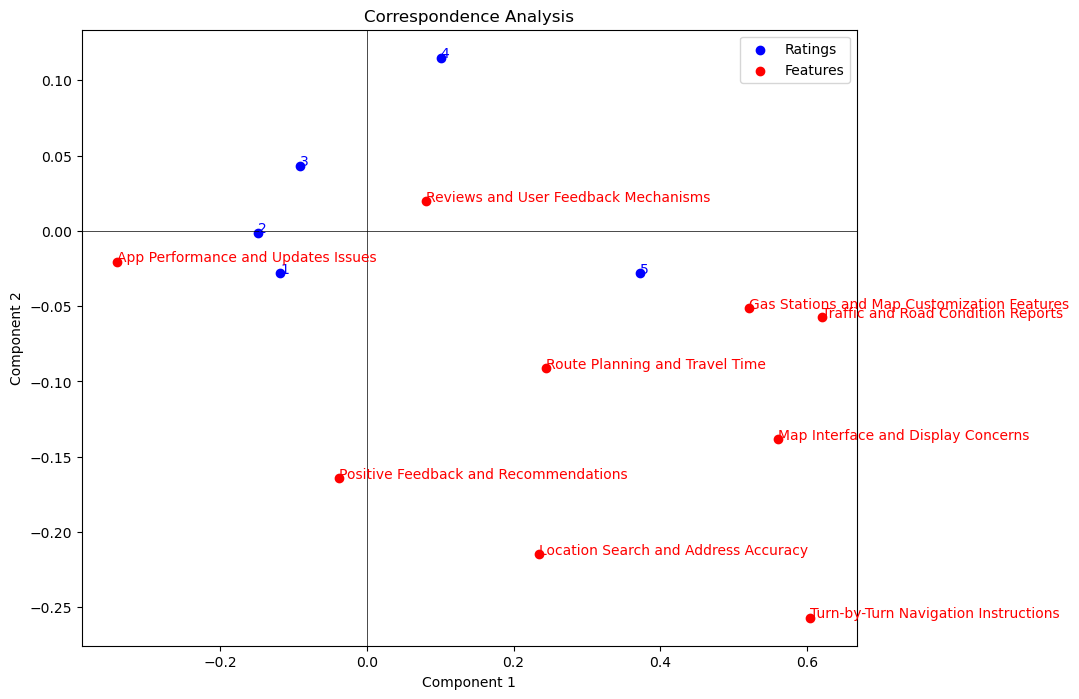

In [111]:
import matplotlib.pyplot as plt

# Plot the row coordinates
plt.figure(figsize=(10, 8))
plt.scatter(row_coordinates.iloc[:, 0], row_coordinates.iloc[:, 1], c='blue', label='Ratings')

# Annotate the rows
for i, txt in enumerate(row_coordinates.index):
    plt.annotate(txt, (row_coordinates.iloc[i, 0], row_coordinates.iloc[i, 1]), color='blue')

# Plot the column coordinates
plt.scatter(column_coordinates.iloc[:, 0], column_coordinates.iloc[:, 1], c='red', label='Features')

# Annotate the columns
for i, txt in enumerate(column_coordinates.index):
    plt.annotate(txt, (column_coordinates.iloc[i, 0], column_coordinates.iloc[i, 1]), color='red')

# Add labels and legend
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Correspondence Analysis')

# Remove all grid lines
plt.grid(False)

# Add grid lines only at the origin
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Add legend and show plot
plt.legend()
plt.show()